In [1]:
#importing basic libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing dataset
df = pd.read_csv("churndata.csv")

In [3]:
#reading data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#exploring the datatypes of all columns of dataset
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#Total charges is an object type, but it should be numeric; hence, I am converting it to numerical type
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [6]:
#exploring the count of null values in each column
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#only TotalCharges column has 11 values which is approx. 0.16% of the total data. Hence, we can remove rows with null values in TotalCharges
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#dropping CustomerID column because it is of no use in analysis
df.drop(columns= ['customerID'], axis=1, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c23a8ede48>,
 'caps': [<matplotlib.lines.Line2D at 0x1c23a8f7f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c23a8ed288>],
 'medians': [<matplotlib.lines.Line2D at 0x1c23a8fbec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c23a8fbfc8>],
 'means': []}

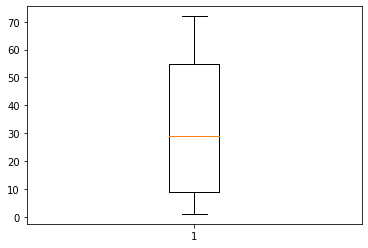

In [10]:
#Plotting box plot for numerical values to identify outliers
plt.boxplot(df.tenure) #tenure

{'whiskers': [<matplotlib.lines.Line2D at 0x1c23a99fec8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c23a9a4f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c23a99f648>],
 'medians': [<matplotlib.lines.Line2D at 0x1c23a9a7fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c23a9a7f48>],
 'means': []}

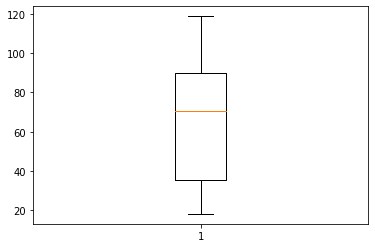

In [11]:
plt.boxplot(df.MonthlyCharges) #MonthlyCharges

{'whiskers': [<matplotlib.lines.Line2D at 0x1c23aa0df08>,
 'caps': [<matplotlib.lines.Line2D at 0x1c23aa12ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c23aa0d4c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c23aa15e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c23aa15f08>],
 'means': []}

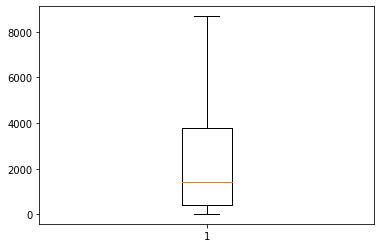

In [12]:
plt.boxplot(df.TotalCharges) #TotalCharges

In [13]:
#No outliers are found in any of the numerical column

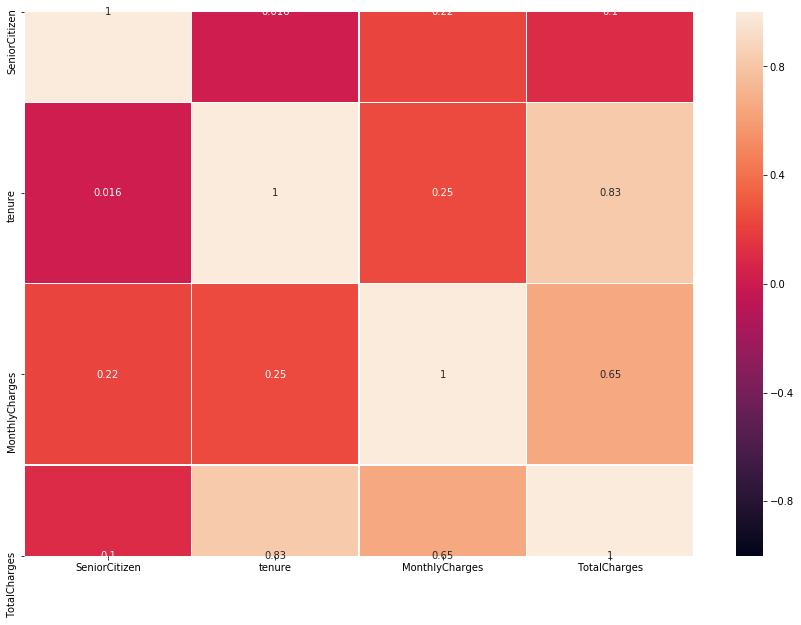

In [14]:
#Time to identify the corelation b/w quantitaive data
import seaborn as sns
corrmatrix = df.corr()
f, axis = plt.subplots(figsize =(15, 10)) 
sns.heatmap(corrmatrix, ax = axis, linewidths = 0.2, vmin=-1, vmax=1, annot=True)

In [15]:
#Heatmap shows the strong correlation between tenure & TotaCharges and TotalCharges & MonthlyCharges

Text(0.5, 0, 'Total Charges')

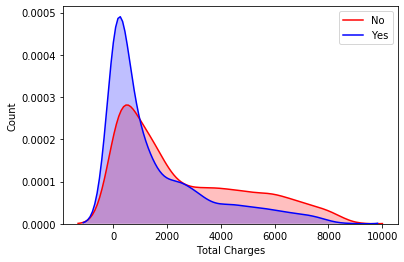

In [16]:
#Plotting graphs to evaluate the affect of quantitative variables on churn
TC_Churn = sns.kdeplot(df.TotalCharges[(df["Churn"] == "No") ], color="Red", shade = True, label="No")
TC_Churn = sns.kdeplot(df.TotalCharges[(df["Churn"] == "Yes") ], color="Blue", shade= True, label="Yes")
TC_Churn.set_ylabel('Count')
TC_Churn.set_xlabel('Total Charges')

In [17]:
#Above line plot shows that highest churn (YES) is observed at low total charges.

Text(0.5, 0, 'Monthly Charges')

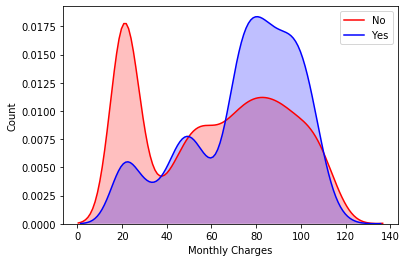

In [18]:
MC_Churn = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == "No") ], color="Red", shade = True, label="No")
MC_Churn = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == "Yes") ], color="Blue", shade= True, label="Yes")
MC_Churn.set_ylabel('Count')
MC_Churn.set_xlabel('Monthly Charges')

In [19]:
#Above line plot shows that as the monthly charges increase, churn also increases(YES).

Text(0.5, 0, 'Tenure')

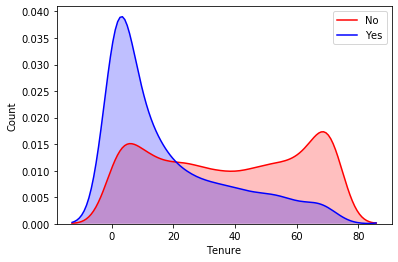

In [20]:
Tenure_Churn = sns.kdeplot(df.tenure[(df["Churn"] == "No") ], color="Red", shade = True, label="No")
Tenure_Churn = sns.kdeplot(df.tenure[(df["Churn"] == "Yes") ], color="Blue", shade= True, label="Yes")
Tenure_Churn.set_ylabel('Count')
Tenure_Churn.set_xlabel('Tenure')

In [21]:
#Above line plot indicates that churn(YES) is high at less number of tenures

ValueError: cannot insert Churn, already exists

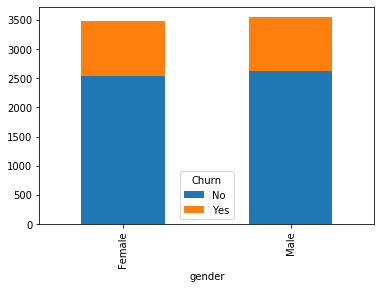

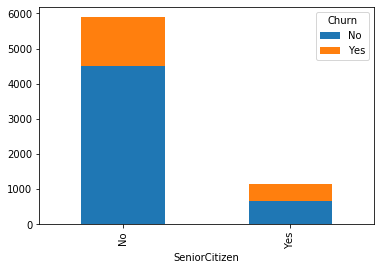

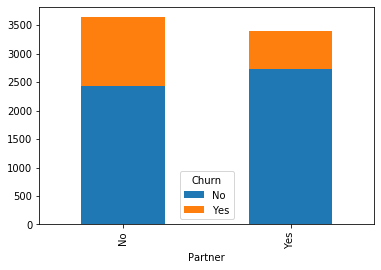

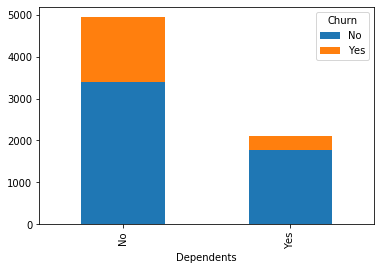

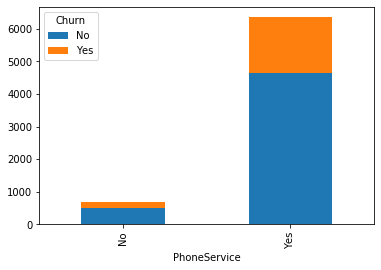

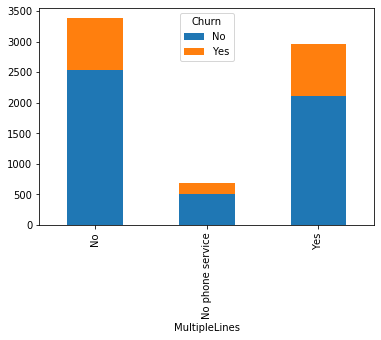

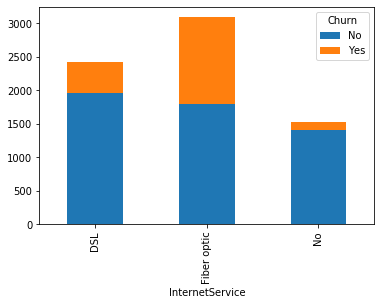

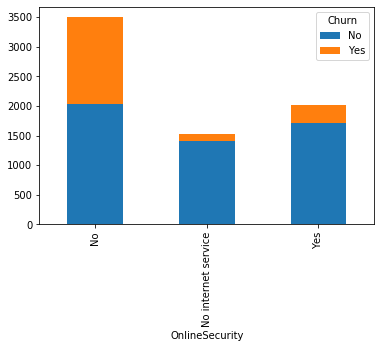

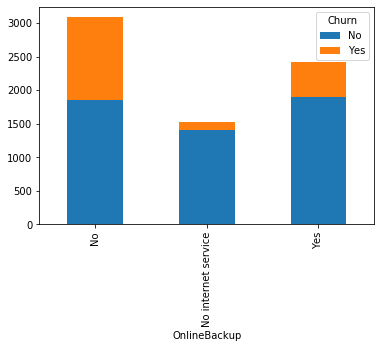

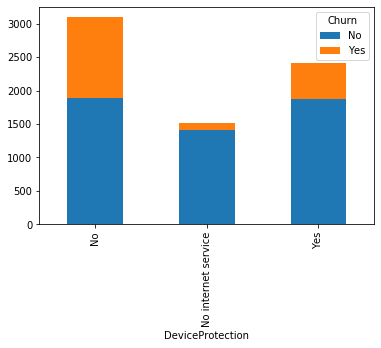

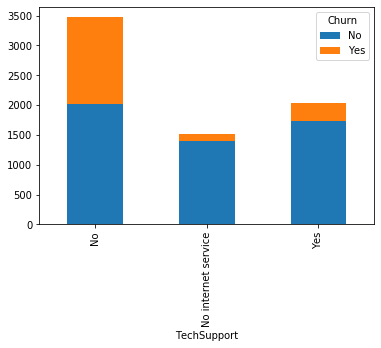

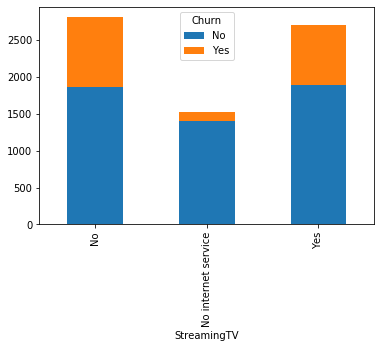

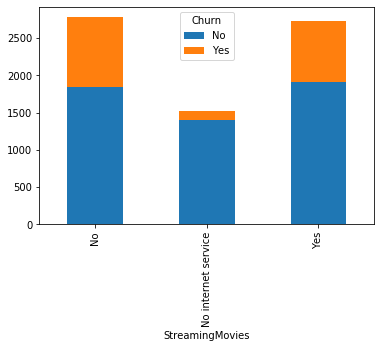

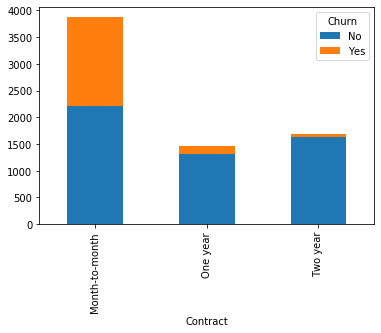

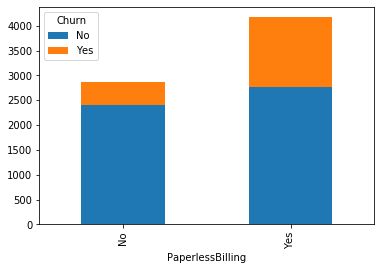

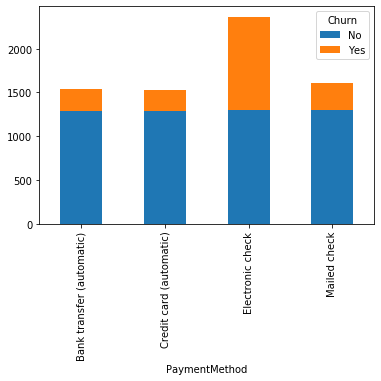

In [41]:
#Replacing values of SeniorCitizen with Yes and No
df['SeniorCitizen'].replace(1,'Yes', inplace=True)
df['SeniorCitizen'].replace(0,'No', inplace=True)


#keeping categorical columns only
df2 = df.drop(columns=[ 'tenure', 'MonthlyCharges', 'TotalCharges'])

#plotting graphs to understand the relation b/w categorical columns and churn
for i, value in enumerate(df2):
    df_plot = df2.groupby(['Churn', value]).size().reset_index().pivot(columns='Churn', index=value, values=0)
    df_plot.plot(kind='bar', stacked=True)

In [42]:
#Important insights that can be obtained from above bar plots are : 
# 1) young people tends to churn more than senior citizen because they tend to avail different oragnization's offer
# 2) ppl without dependents & partners tend to churn more because they are on their own only and can get involved with other oofers & organizations
# 3) ppl with fiber optic cable tend to churn more 
# 4) little to no onlinesecurity, OnlineBackup, DeviceProtection & TechSupport results in customer churning
# 5) Churn is same with & without StreamingTV and StreamingMovies (neglecting no internet service for now)
# 6) Churn is high for month-to-month contracts
# 7) Churn is little high for paperlessBilling
# 8) ppl who avail Electronic check payment method tend to churn more than ppl with any other payment method
# But if we look on each category individually then customer churn(YES) is still less than the customers who are not churning(NO) except for
#the following attributes where churn is significant: TechSupport, DeviceProtection, OnlineSecurity, InternetService, Contract, PaymentMethod

In [45]:
df.to_csv("TelcoChurn.csv")